In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0. Prepare Data

This chapter use "EuStockMarkets" dataset from R. <br>
This contains Stock Index of the Europe Start = c(1991, 130) End = c(1998, 169) 

In [3]:
EuStockMarkets = pd.read_csv("Data/EuStockMarkets.csv")
EuStockMarkets.head(3)

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2


# 1. Common EDA methods

1. Charts
2. Summary statistics
3. Histogram
4. Scattar plots

### 1.1 Charts

<Axes: >

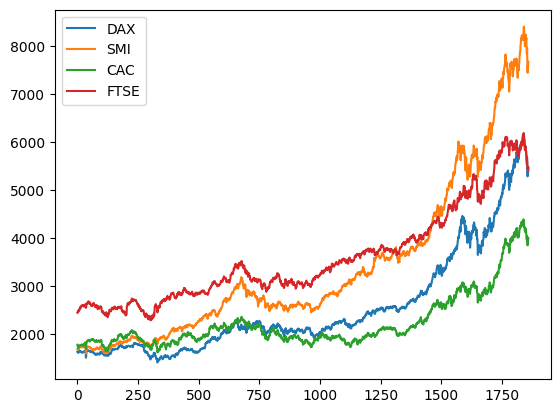

In [4]:
EuStockMarkets.plot()

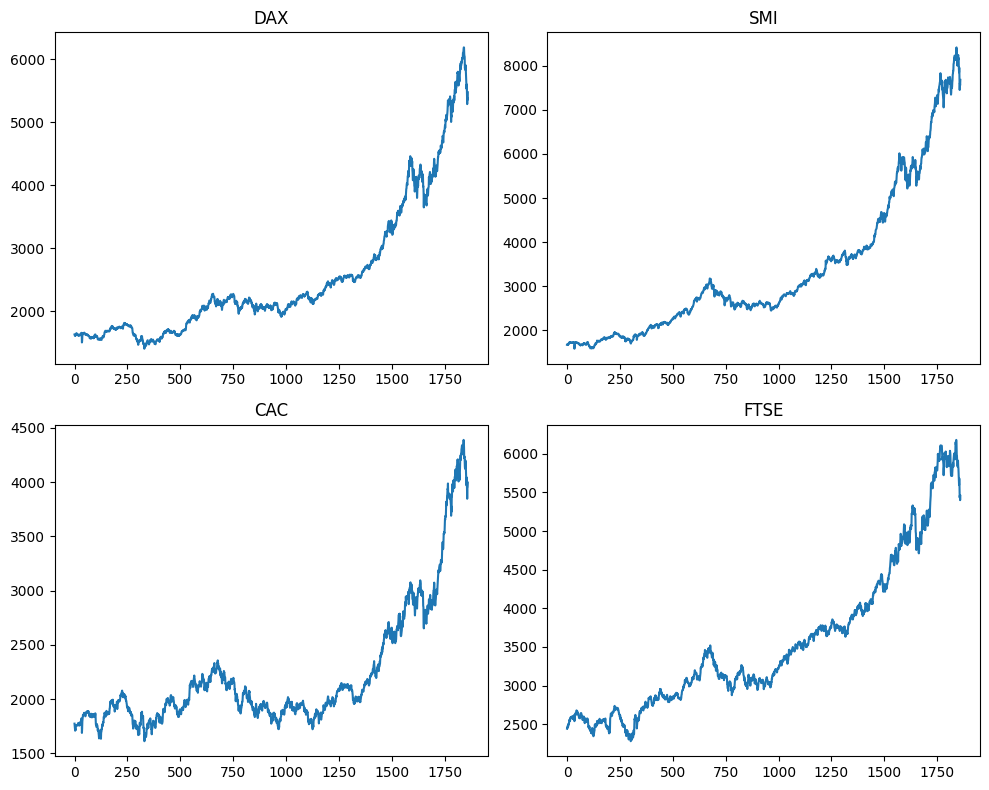

In [5]:
def plot_stock_components(dataframe):
    plt.figure(figsize=(10, 8))

    components = ["DAX", "SMI", "CAC", "FTSE"]
    
    for i, component in enumerate(components, start=1):
        plt.subplot(2, 2, i)
        plt.plot(dataframe[[component]])
        plt.title(component)
    
    plt.tight_layout()
    plt.show()

plot_stock_components(EuStockMarkets)

### 1.2 Histogram

Histogram is commonly used for non-TS data, but can be used for TS data to analyze the adjacent data

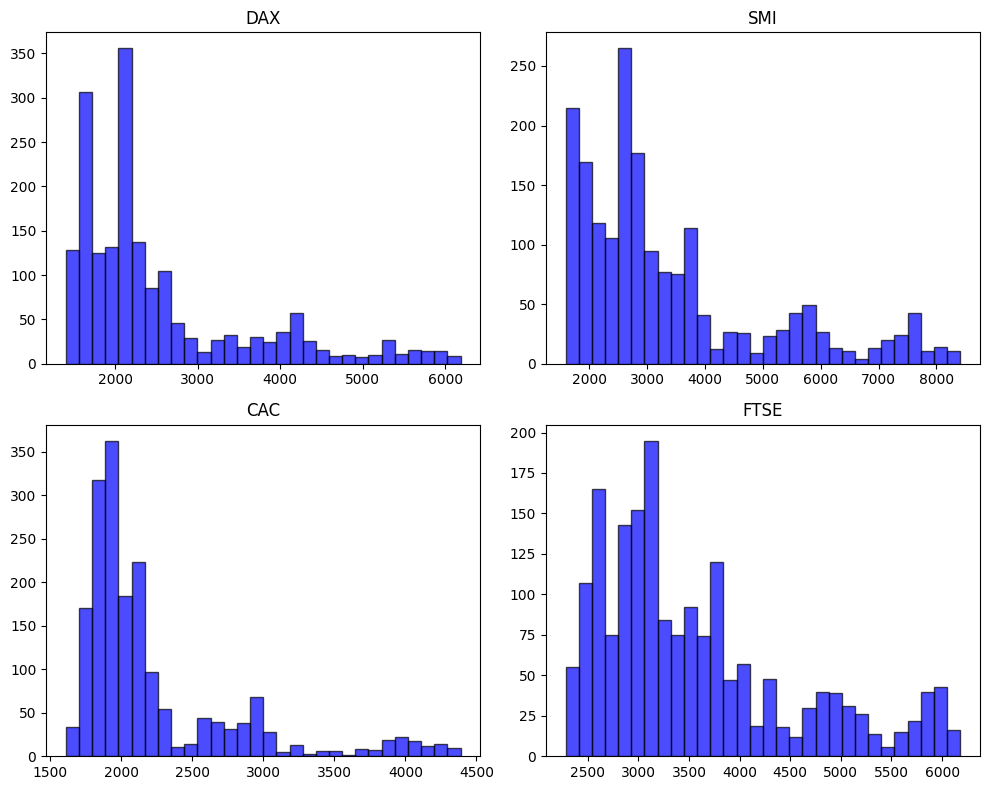

In [6]:

def plot_stock_components_histogram(dataframe):
    plt.figure(figsize=(10, 8))

    components = ["DAX", "SMI", "CAC", "FTSE"]
    
    for i, component in enumerate(components, start=1):
        plt.subplot(2, 2, i)
        plt.hist(EuStockMarkets[[component]], bins=30, color='blue', edgecolor='black', alpha=0.7)
        plt.title(component)
    
    plt.tight_layout()
    plt.show()

plot_stock_components_histogram(EuStockMarkets)

### 1.3.1 Scatter Plot
 - Very useful to see the linear relationship between two variables

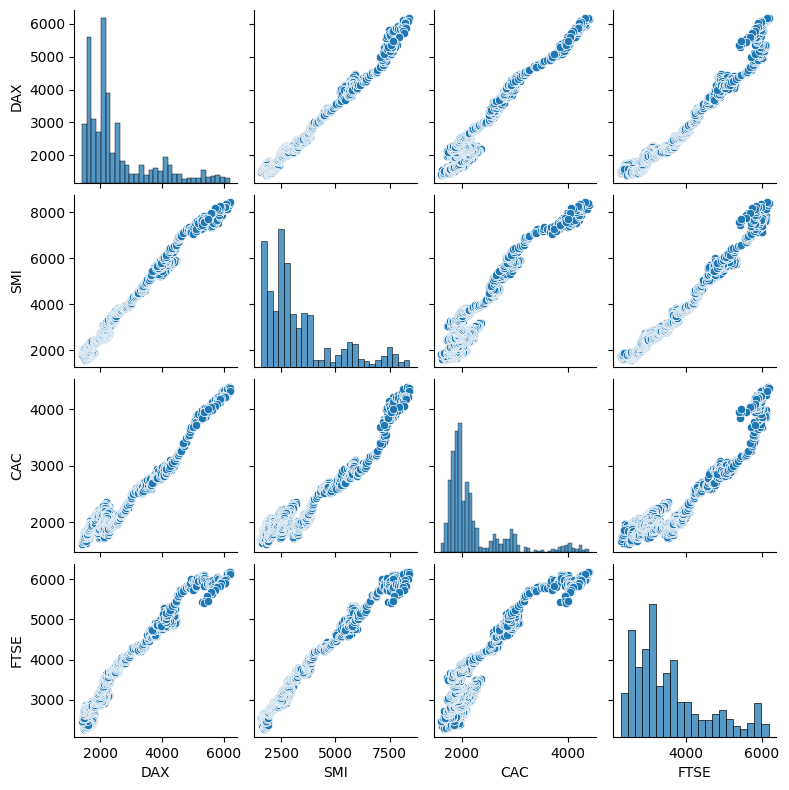

In [13]:
import seaborn as sns


sns.pairplot(EuStockMarkets, height=2)

From above gragh, it seems that one stock price has high correlation between the other and is believe to be used for predict stock price of the other. <br>
In example, "DAX" and "SMI" has positive and strong linear correlation.We can't conclude that one varible can be a predictor of the other. They could move the same direction because of the other reason. To clarify this, we have to make the data **stationary**

### 1.3.2 Achieve Stationarity

<Axes: >

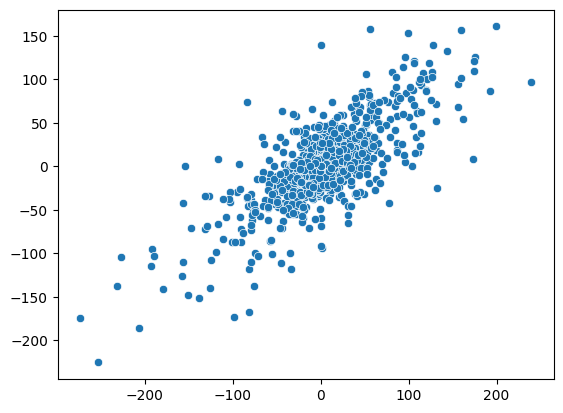

In [44]:
SMI = EuStockMarkets["SMI"]
DAX = EuStockMarkets["DAX"]

SMI_diff = np.diff(SMI)
DAX_diff = np.diff(DAX)

sns.scatterplot(x = SMI_diff, y= DAX_diff)

From above gragh, we still can see the linearity in correlation, but, does it mean that one variable can be a predictor of the other? . To be it, we have to see the correlation between lagged variable and the other is not. <br> 
If we still can see the strong correlation between them, that means one can be act as a predictor

<Axes: >

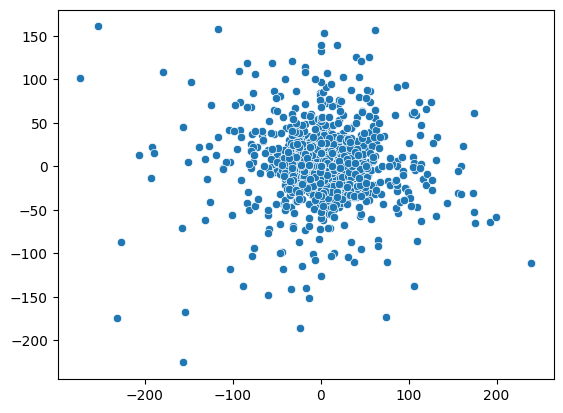

In [46]:
SMI_diff_bwd_lagged = SMI_diff[:-1]
DAX_diff_fwd_lagged = DAX_diff[1:]

sns.scatterplot(x = SMI_diff_bwd_lagged, y = DAX_diff_fwd_lagged)

We can observe that there is no coreelation, meaning that two stock prices are irrelavant in linear relationship

### 1.4 Summary so far
Non time series eda could also be useful to the time series, but we must be aware of that the characteristic of the TS data

# 2. TS specialized EDA

Topics to discus in this part
1. Stationarity
2. Self Correlation
    - Meaning that TS data's Dynamics. Like how much past data is related to the future dat
3. Spurious Correlation
    - Must be aware of the the correlation doesn't mean the causation
    
Mehotd that apply above theorems
1. Rolling window
2. Self correlation function
3. Autocorrelation function
4. Partial autocorrelation


### 2.1 Understand Stationarity

Condition to be statioary
- Constant Mean and STD
- No seasonality
- Gaussian Errors

### 2.1.1 ADF (augmented Dickey-Fuller)
- Common test to check the stationarity of the ts

Method to achieve stationarity
1. Differencing (Max 3 times)
2. Log, Square root transformation to achieve heteroscedasicity

### 2.2 Rolling window

Rolling Window
- Specialized in the TS data

<Axes: >

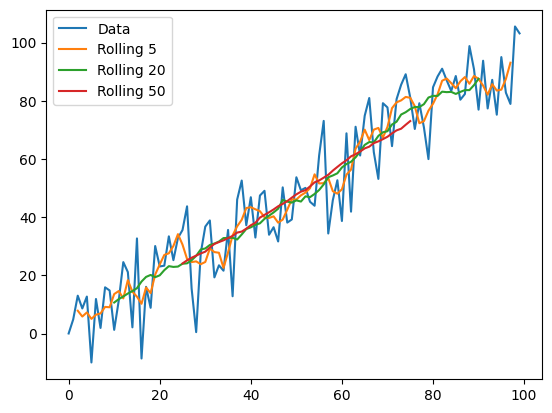

In [98]:
# Implement of the rolling window
mean = 0
std_dev = 10
num_samples = 100
random_noise = np.random.normal(mean, std_dev, num_samples)
random_noise = random_noise + np.arange(1,101) 

rand_df = pd.DataFrame({
    "Data": random_noise
})

rand_df["Rolling 5"] = rand_df["Data"].rolling(window=5, center = True).mean()
rand_df["Rolling 20"] = rand_df["Data"].rolling(window=20, center = True).mean()
rand_df["Rolling 50"] = rand_df["Data"].rolling(window=50, center = True).mean()

rand_df.plot()

### 2.3 Self Correlation Function
- Basic assumption of the Self Correlation is one time is correlated with the other time. We can enlarge this idea to the **autocorrelation**

### 2.3.1 Autocorrelation
- Autocorrelation represent how much a data is correlated(linear relationship) to the lagged data in the single time series

### 2.3.1 Partial Autocorrelation
- It consider "information" between two time points
- It reveals "actually" useful information from one time point to explain other


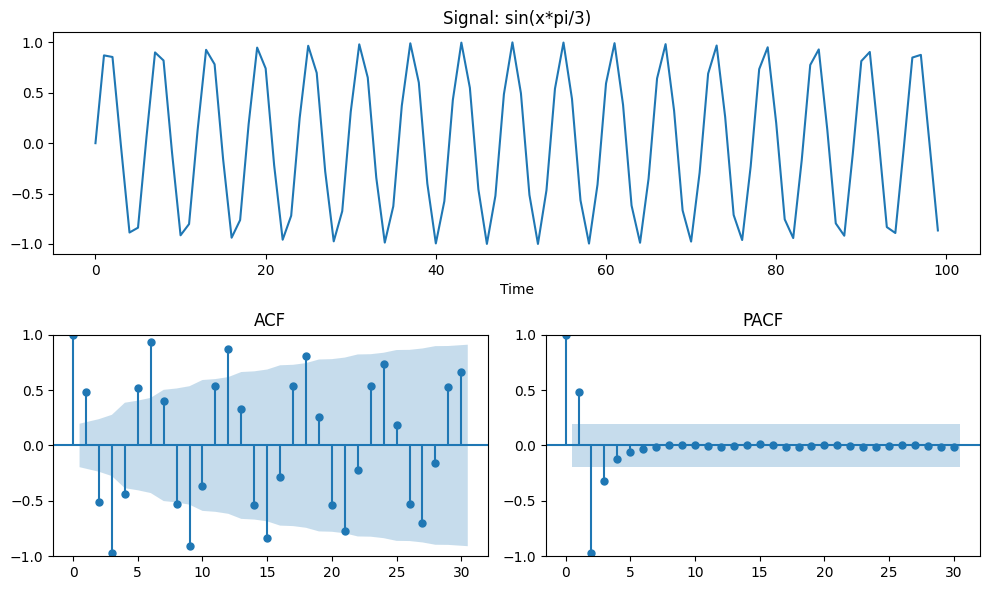

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf_signal(signal, title, lags=30):
    # Create a time axis
    time = np.arange(0, len(signal))
    
    # Plot the signal
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, signal)
    plt.title(title)
    plt.xlabel("Time")
    
    # Plot the ACF
    plt.subplot(2, 2, 3)
    plot_acf(signal, lags=lags, ax=plt.gca())
    plt.title("ACF")
    
    # Plot the PACF
    plt.subplot(2, 2, 4)
    plot_pacf(signal, lags=lags, ax=plt.gca())
    plt.title("PACF")
    
    plt.tight_layout()
    plt.show()

# Generate the sin(x*pi/3) signal
time_points = np.linspace(0, 100, num=100)
sin_signal = np.sin(time_points * np.pi / 3)

# Plot the ACF and PACF of the sin(x*pi/3) signal
plot_acf_pacf_signal(sin_signal, "Signal: sin(x*pi/3)")

The Acf of the sin function also shows the oscillation like sin(pi*x/3). However, the pacf of the sin function has cut off, meaing that lags of hihger than 4 is not that useful.

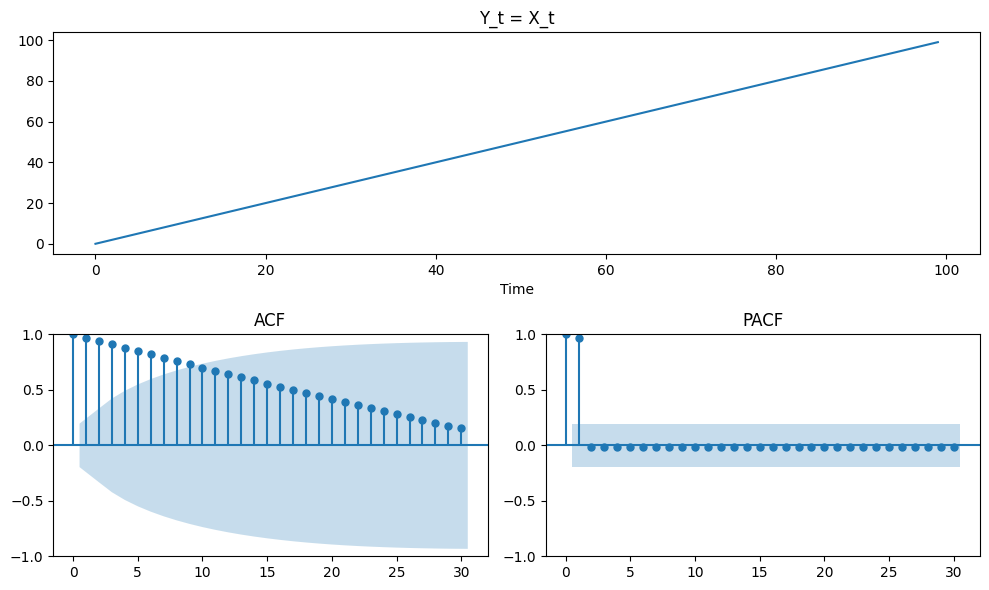

In [13]:
# Plot the ACF and PACF of the sin(x*pi/3) signal
plot_acf_pacf_signal(range(100), "Y_t = X_t")

ACF saying that all of the lags having high correaltion with other points. However, PACF shows that at lag 1, we have all the information to explain the data

### 2.4 Spurious Correlation

- We always have to be aware of the wrong interpretation. For instance, death by coconut fells, and death by sharks are highly correlated, because more coconut in summar, and more people go to the beach in summar. However, we can't conclude the exterminating coconut trees would reduce the death by sharks.

- **cointergration** represent the actual relationship between two time series.

- In conclusion, even though we have found the strong correlation between two variables, we have to consider what really caused the correlation.


# 3. Visualization